In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import qgrid
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set()

[Data address]( http://data.tainan.gov.tw/dataset/dengue-dist/resource/9830c8ee-d5bb-4d9e-bb47-4f27c7c0fb5c): temperature data from Tainan government

In [4]:
# the last updated data up to 2015-12-22   
file='data/20151222-en.csv'
dfs1 = pd.DataFrame.from_csv(file,index_col=0)

In [7]:
dfs1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2012-06-01 to 2015-12-22
Data columns (total 31 columns):
測站氣壓(hPa)StnPres                   1300 non-null float64
海平面氣壓(hPa)SeaPres                  1300 non-null float64
測站最高氣壓(hPa)StnPresMax              1300 non-null float64
測站最高氣壓時間(LST)StnPresMaxTime        1300 non-null object
測站最低氣壓(hPa)StnPresMin              1300 non-null float64
測站最低氣壓時間(LST)StnPresMinTime        1300 non-null object
Temperature                        1300 non-null float64
最高氣溫(℃)T Max                       1300 non-null object
最高氣溫時間(LST)T Max Time              1299 non-null object
最低氣溫(℃)T Min                       1300 non-null object
最低氣溫時間(LST)T Min Time              1299 non-null object
露點溫度(℃)Td dew point                1300 non-null float64
相對溼度(%)RH                          1300 non-null int64
最小相對溼度(%)RHMin                     1300 non-null object
最小相對溼度時間(LST)RHMinTime             1293 non-null object
風速(m/s)WS                     

In [8]:
dfs2=dfs1[['Temperature']]
dfs2[949:950]

,Temperature
date,
2015-01-06,21.6


In [10]:
# temerature data from 2015-1-1
dfs3=dfs2[949:]

In [12]:
qgrid.show_grid(dfs3)

In [13]:
# cases data 
df = pd.DataFrame.from_csv('data/test.csv',index_col=0,parse_dates=[0])
df['date']=pd.to_datetime(df['date'])
df['num']=1

In [14]:
qgrid.show_grid(df)

In [20]:
cases=df[['date','num']]
cases_group = cases.groupby('date');
cases_totals = cases_group.sum()

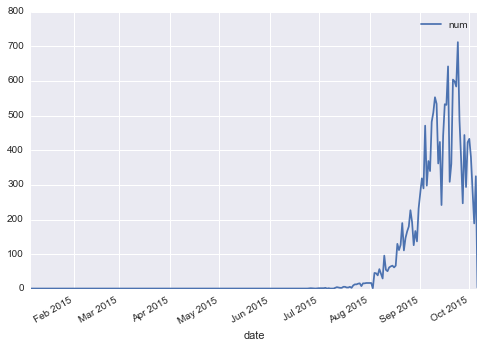

In [16]:
my_plot = cases_totals.plot()

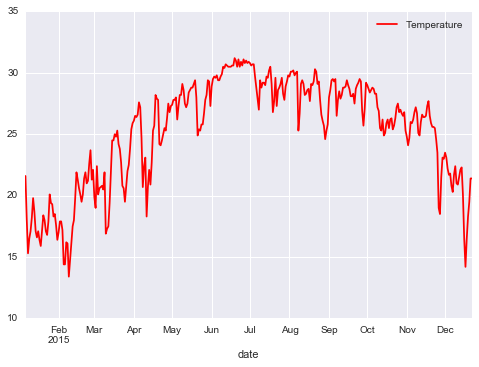

In [17]:
my_plot2=dfs3.plot(color="red")

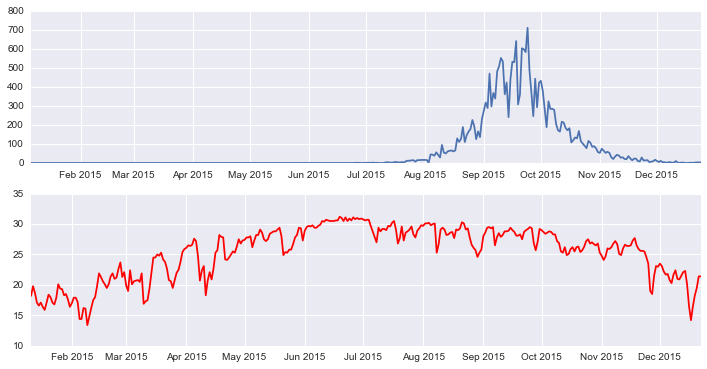

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.plot(cases_totals.index[:-13],cases_totals[:-13])
plt.subplot(2, 1, 2)
plt.plot(dfs3.index[5:],dfs3[5:]['Temperature'],'r')

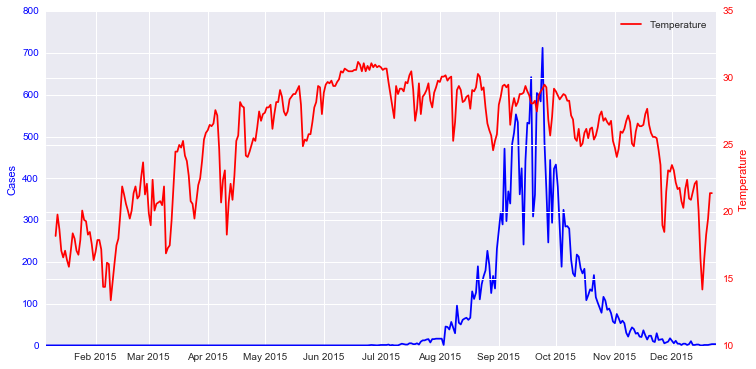

In [54]:
plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(cases_totals.index[:-13],cases_totals[:-13], 'b-')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Cases', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.legend()  

ax2 = ax1.twinx()

ax2.plot(dfs3.index[5:],dfs3[5:]['Temperature'], 'r',label="Temperature")
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.legend()    

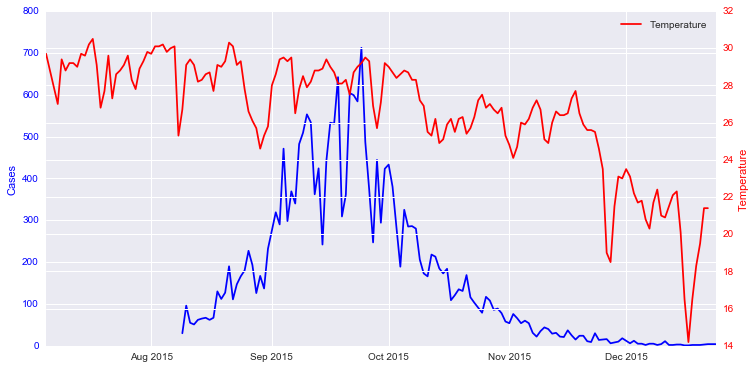

In [53]:
plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(cases_totals.index[50:-13],cases_totals[50:-13], 'b-')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Cases', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.legend()  

ax2 = ax1.twinx()

ax2.plot(dfs3.index[180:],dfs3[180:]['Temperature'], 'r',label="Temperature")
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.legend()    

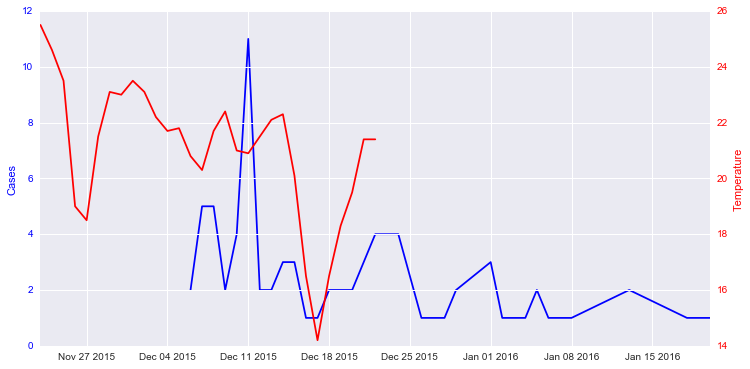

In [24]:
plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(cases_totals.index[-30:],cases_totals[-30:], 'b-')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Cases', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()

ax2.plot(dfs3.index[-30:],dfs3['Temperature'][-30:], 'r')
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

/Users/cch/anaconda3/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


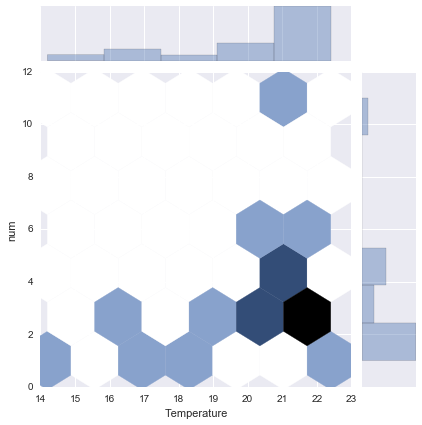

In [27]:
first=-30
df_temp=cases_totals[first:]
df_temp['Temperature']=dfs3['Temperature'][first:]
sns.jointplot( df_temp.Temperature,  df_temp.num, kind="hex", stat_func=None)
